In [14]:
!pip install geopandas

# required imports

import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import numpy as np

sns.set_style('whitegrid')

In [4]:
# Read the first sheet from the Excel File

file_name = 'statewise-eng.csv'
csv_df = pd.read_csv(file_name)
columns = csv_df.columns


In [5]:
states_csv = csv_df[columns[0]].tolist()
know_english_csv = csv_df[columns[1]].tolist()

<class 'geopandas.geodataframe.GeoDataFrame'>


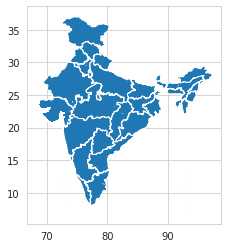

In [8]:
# reading the state wise shapefile of India in a GeoDataFrame and preview it

fp = "Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)
states_and_ut = map_df['st_nm'].tolist()
print(type(map_df))

# Plot the default map
map_df.plot()

In [9]:
# Join both the DataFrames by state names

merged = map_df.set_index('st_nm').join(csv_df.set_index('State'))
merged

,geometry,Percent of responders who know english
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",16.4
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",1.7
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",44.2
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",1.6
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",31.4


In [11]:
# Detect missing values. Return a boolean same-sized object indicating if the values are NA

merged.isna().sum()

geometry                                  0
Percent of responders who know english    8
dtype: int64

In [13]:
# Summary to get the max and min and other statistical data on the dataset

merged.describe()

,Percent of responders who know english
count,28.000000
mean,12.178571
std,12.006522
min,1.100000
25%,2.800000
50%,7.700000
75%,16.575000
max,44.200000


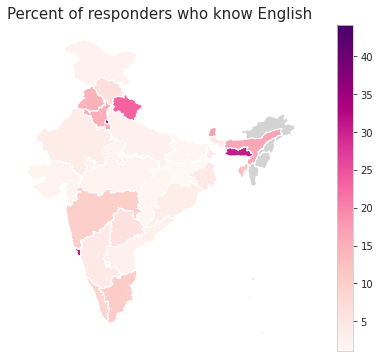

In [29]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Percent of responders who know English', fontdict={'fontsize': '15', 'fontweight' : '3'})

# plot the figure
merged.plot(column='Percent of responders who know english', 
            cmap='RdPu', 
            linewidth=0.9, 
          ax=ax, edgecolor='1',
          legend=True, missing_kwds={
          "color": "lightgrey",
          "label": "Missing values",
    },)

In [30]:
# We save the output as a PNG image

fig.savefig("State_wise_english_1.png", dpi=100)

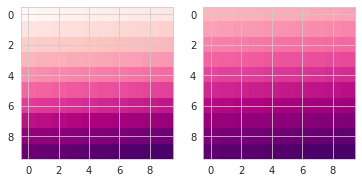

In [36]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('RdPu')
new_cmap = truncate_colormap(cmap, 0.3, 1)

ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

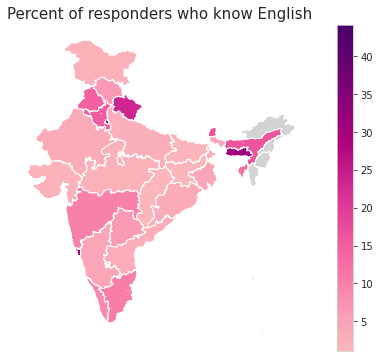

In [37]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Percent of responders who know English', fontdict={'fontsize': '15', 'fontweight' : '3'})

# plot the figure
merged.plot(column='Percent of responders who know english', 
            cmap= new_cmap, 
            linewidth=0.9, 
          ax=ax, edgecolor='1',
          legend=True, missing_kwds={
          "color": "lightgrey",
          "label": "Missing values",
    },)

In [34]:
fig.savefig("State_wise_english_fin.png", dpi=100)